In [28]:
import nltk
import pandas as pd
import numpy as np
import sklearn
import csv
import re
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix

In [2]:
csv_file = 'deception_data_converted_final_v2.csv'

df_review = pd.read_csv(csv_file, encoding = "ISO-8859-1")
df_review.dropna(inplace=True)
print(df_review.shape)

(92, 3)


In [3]:
df_review.head()

,lie,sentiment,review
0,f,n,Mike s Pizza High Point NY Service was very s...
1,f,n,i really like this buffet restaurant in Marsh...
2,f,n,After I went shopping with some of my friend ...
3,f,n,Olive Oil Garden was very disappointing I exp...
4,f,n,The Seven Heaven restaurant was never known f...


In [4]:
lieCol = df_review['lie']
sentCol = df_review['sentiment']
df_review.drop(['lie','sentiment'], axis=1, inplace=True)
df_review.head()

,review
0,Mike s Pizza High Point NY Service was very s...
1,i really like this buffet restaurant in Marsh...
2,After I went shopping with some of my friend ...
3,Olive Oil Garden was very disappointing I exp...
4,The Seven Heaven restaurant was never known f...


In [5]:
my_list = []
shortword = re.compile(r'\W*\b\w{1,3}\b')
my_list = [shortword.sub('', df_review.iloc[i,0]) for i in range(len(df_review))]


In [6]:
my_list[9]

' Yesterday went casino restaurant called NoFreeDrinks First thought just name later blackjack table when ordered attendant round Jack Coke instead saying Yeah sure attendant said preposterous have never paid drinks casino Clearly casino does understand that more people drink more they will loose Someone needs teach casino business '

In [7]:
count_vecNB = CountVectorizer(input="content", analyzer = 'word', stop_words = 'english', lowercase = True)
count_vecNBBer = CountVectorizer(input="content", analyzer = 'word', stop_words = 'english', lowercase = True)

cvNB = count_vecNB.fit_transform(my_list)
cvNBBer = count_vecNBBer.fit_transform(my_list)

# stolen from Dr. Gates
MyColumnNames=count_vecNB.get_feature_names()
VectorizedDF_Text = pd.DataFrame(cvNB.toarray(),columns = MyColumnNames)
BinaryDF_Text = pd.DataFrame(cvNBBer.toarray(), columns = MyColumnNames)

BinaryDF_Text=BinaryDF_Text.fillna(0)

In [8]:
'''
print(VectorizedDF_Text.shape) # check size of vecorization before

threshold = 0 # threshold for drop
to_drop = [] # store indexes needed to be dropped

# id all indexes that don't meet threshold       
to_drop =  [i for i in range (len(VectorizedDF_Text.columns)) if sum(VectorizedDF_Text.iloc[:,i]) < threshold]  

# drop columns that don't meet threshold
VectorizedDF_Text.drop(VectorizedDF_Text.columns[to_drop],axis=1,inplace=True)

print(VectorizedDF_Text.shape)  # check size of vecorization after
'''


"\nprint(VectorizedDF_Text.shape) # check size of vecorization before\n\nthreshold = 0 # threshold for drop\nto_drop = [] # store indexes needed to be dropped\n\n# id all indexes that don't meet threshold       \nto_drop =  [i for i in range (len(VectorizedDF_Text.columns)) if sum(VectorizedDF_Text.iloc[:,i]) < threshold]  \n\n# drop columns that don't meet threshold\nVectorizedDF_Text.drop(VectorizedDF_Text.columns[to_drop],axis=1,inplace=True)\n\nprint(VectorizedDF_Text.shape)  # check size of vecorization after\n"

In [9]:
VectorizedDF_Text.head()

,abruptly,absolutely,acceptable,accord,acknowledge,actual,actually,additional,adorable,affordable,...,wreck,write,written,wrong,wrote,yeah,yelp,yesterday,york,yuenan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
BinaryDF_Text.head()

,abruptly,absolutely,acceptable,accord,acknowledge,actual,actually,additional,adorable,affordable,...,wreck,write,written,wrong,wrote,yeah,yelp,yesterday,york,yuenan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
nb_final_df = VectorizedDF_Text
nber_final_df = BinaryDF_Text

nb_final_df.insert(0, 'Lie', lieCol.to_frame())
nb_final_df.insert(1, 'Sentiment', sentCol.to_frame())

nber_final_df.insert(0, 'Lie', lieCol.to_frame())
nber_final_df.insert(1, 'Sentiment', sentCol.to_frame())

In [12]:
train_nb, test_nb = train_test_split(nb_final_df, test_size=0.3)
print(train_nb.shape)
print(test_nb.shape)

train_ber, test_ber = train_test_split(nber_final_df, test_size=0.3)
print(train_ber.shape)
print(test_ber.shape)

(64, 1161)
(28, 1161)
(64, 1161)
(28, 1161)


### Multinomial Naive Bayes

In [13]:
nb_model_s = MultinomialNB()
nb_model_l = MultinomialNB()

sentiment_l = train_nb['Sentiment']
lie_l = train_nb['Lie']


train_NB = train_nb.drop(['Lie','Sentiment'],axis=1)

nb_model_s.fit(train_NB, sentiment_l)
nb_model_l.fit(train_NB, lie_l)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
actual_l = test_nb['Lie']
actual_s = test_nb['Sentiment']

test_NB = test_nb.drop(['Lie','Sentiment'],axis=1)

prediction_s = nb_model_s.predict(test_NB)
prediction_l = nb_model_l.predict(test_NB)

In [15]:
cm_s = confusion_matrix(actual_l, prediction_l)
cm_l = confusion_matrix(actual_s, prediction_s)

In [16]:
print(cm_s)
print()
print(cm_l)

[[ 9  3]
 [12  4]]

[[ 9  6]
 [ 1 12]]


### Bernoulli Naive Bayes

In [17]:
ber_model_s = BernoulliNB()
ber_model_l = BernoulliNB()

#train_ber, test_ber

sentiment_l = train_ber['Sentiment']
lie_l = train_ber['Lie']


train_NBer = train_ber.drop(['Lie','Sentiment'],axis=1)

ber_model_s.fit(train_NBer, sentiment_l)
ber_model_l.fit(train_NBer, lie_l)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [18]:
ber_model_s.predict(test_ber.drop(['Lie','Sentiment'],axis=1))
ber_model_l.predict(test_ber.drop(['Lie','Sentiment'],axis=1))

ber_sent_matrix = confusion_matrix(test_ber['Sentiment'], ber_model_s.predict(test_ber.drop(['Lie','Sentiment'],axis=1)))
ber_lie_matrix = confusion_matrix(test_ber['Lie'], ber_model_l.predict(test_ber.drop(['Lie','Sentiment'],axis=1)))

print(ber_sent_matrix)
print()
print(ber_lie_matrix)

[[ 9  7]
 [ 0 12]]

[[ 2 15]
 [ 1 10]]


In [45]:
# borrowed from:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# made a few modifications

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[ 9  3]
 [12  4]]


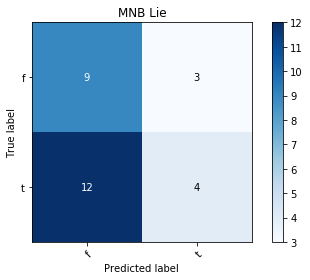

In [47]:
plot_confusion_matrix(actual_l, prediction_l, title='MNB Lie')
# 0.46

Confusion matrix, without normalization
[[ 9  6]
 [ 1 12]]


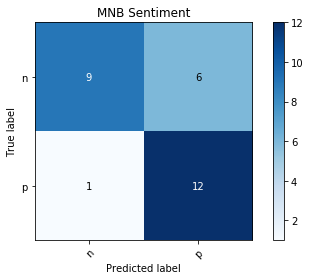

In [48]:
plot_confusion_matrix(actual_s, prediction_s , title='MNB Sentiment')
# 0.75

Confusion matrix, without normalization
[[ 9  7]
 [ 0 12]]


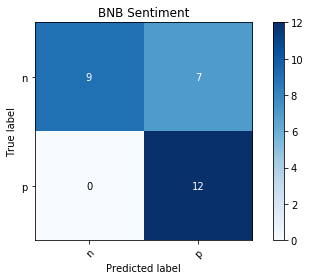

In [49]:
plot_confusion_matrix(test_ber['Sentiment'], ber_model_s.predict(test_ber.drop(['Lie','Sentiment'],axis=1)), title='BNB Sentiment')
# 0.75

Confusion matrix, without normalization
[[ 2 15]
 [ 1 10]]


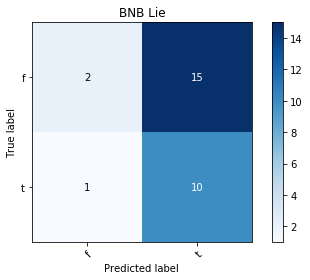

In [50]:
plot_confusion_matrix(test_ber['Lie'], ber_model_l.predict(test_ber.drop(['Lie','Sentiment'],axis=1)), title='BNB Lie')
# 0.42